In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import preprocessing
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
import wave
import pylab
%matplotlib inline

# 1. problem: Five 128x128 images
Represented images channel by channel

In [185]:
leaves = []
for i in range(1, 6):
    leaf = Image.open('leaf%d.png' % i)
    leaves.append(np.array(leaf, dtype=np.float64))

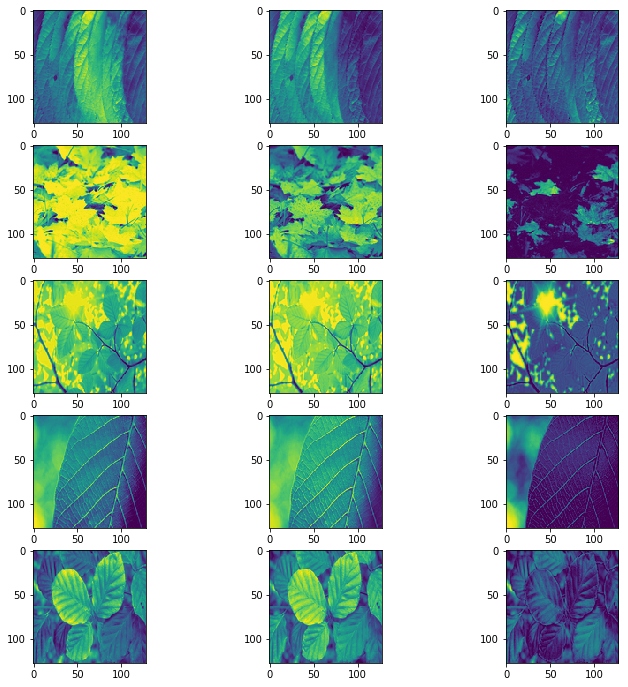

In [88]:
fix, axs = plt.subplots(5, 3, figsize=(12, 12))
for i in range(5):
    for j in range(3):
        axs[i, j].imshow(leaves[i][:,:,j])

# 2. problem: Mean and variance
Calculating the old mean and variance for each channel of each image, calculated again after standardizing them.

In [186]:
for i, leaf in enumerate(leaves):
    for j in range(3):
        print("Mean and variance of leaf%d_%d: " % (i,j) + "%d " % leaf[:,:,j].mean() + " and " + "%d " % leaf[:,:,j].std())
        leaf[:,:,j] = (leaf[:,:,j] - leaf[:,:,j].mean())/leaf[:,:,j].std()
        print("New mean and variance of leaf%d_%d: " % (i,j) + "%f" % leaf[:,:,j].mean() + " and " + "%f " % leaf[:,:,j].std())        
        

Mean and variance of leaf0_0: 123  and 48 
New mean and variance of leaf0_0: 0.000000 and 1.000000 
Mean and variance of leaf0_1: 94  and 46 
New mean and variance of leaf0_1: 0.000000 and 1.000000 
Mean and variance of leaf0_2: 48  and 19 
New mean and variance of leaf0_2: 0.000000 and 1.000000 
Mean and variance of leaf1_0: 208  and 54 
New mean and variance of leaf1_0: 0.000000 and 1.000000 
Mean and variance of leaf1_1: 133  and 55 
New mean and variance of leaf1_1: 0.000000 and 1.000000 
Mean and variance of leaf1_2: 22  and 33 
New mean and variance of leaf1_2: 0.000000 and 1.000000 
Mean and variance of leaf2_0: 182  and 47 
New mean and variance of leaf2_0: -0.000000 and 1.000000 
Mean and variance of leaf2_1: 203  and 37 
New mean and variance of leaf2_1: -0.000000 and 1.000000 
Mean and variance of leaf2_2: 92  and 61 
New mean and variance of leaf2_2: 0.000000 and 1.000000 
Mean and variance of leaf3_0: 101  and 51 
New mean and variance of leaf3_0: 0.000000 and 1.000000 
Me

In [173]:
print("New mean and variance of the whole leaves is: %f " % np.asarray(leaves).mean() + " and " + "%f " % np.asarray(leaves).std())

New mean and variance of the whole leaves is: 0.000000  and 1.000000 


# 3. problem: Frequency of characters in a text

In [291]:
url = 'https://blog.keras.io/the-future-of-deep-learning.html'
res = requests.get(url)
html_page = res.content 
soup = BeautifulSoup(html_page, 'html.parser')
text = soup.get_text()
text = list(text)

In [298]:
soup.get_text()

'\n\n\nThe future of deep learning\n\n\n\n\n\n\n\n\n\n\n\n\nThe Keras Blog \n\n\nKeras is a Deep Learning library for Python, that is simple, modular, and extensible.\n                \n\nArchives\n\nGithub\n\n\nDocumentation\n\n\nGoogle Group\n\n\n\n\n\n The future of deep learning \n\n\n\n                Tue 18 July 2017\n        \n\n                By Francois Chollet\n\nIn Essays. \n\nThis post is adapted from Section 3 of Chapter 9 of my book, Deep Learning with Python (Manning Publications). \n\nIt is part of a series of two posts on the current limitations of deep learning, and its future. \nYou can read the first part here: The Limitations of Deep Learning.\n\nGiven what we know of how deep nets work, of their limitations, and of the current state of the research landscape, \ncan we predict where things are headed in the medium term? Here are some purely personal thoughts. Note that I don\'t have a crystal ball, \nso a lot of what I anticipate might fail to become reality. This

In [292]:
letters_hist = Counter(text)
counts = letters_hist.values() #number of occurences
counts = [i/len(text) for i in counts] #frequency
letters = letters_hist.keys()

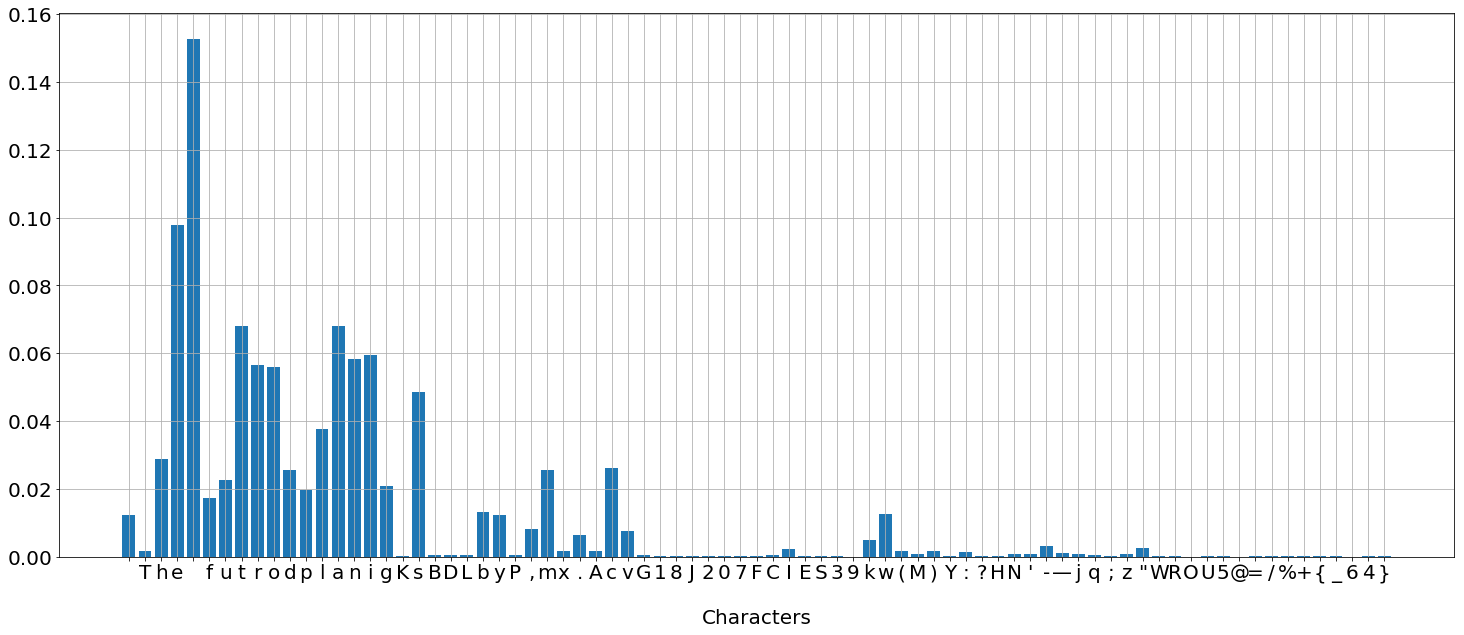

In [297]:
bar_x_locations = np.arange(len(counts))
plt.figure(figsize=(25,10))
plt.bar(bar_x_locations, counts, align = 'center')
plt.xticks(bar_x_locations, letters)
plt.grid()
p = plt.gca()
p.set_xlabel("Characters", fontsize=20)
p.tick_params(axis='x', labelsize=20)
p.tick_params(axis='y', labelsize=20)

# 4. problem: Spectogram of a wav file

In [1]:
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'Int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

/Users/apple/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.
/Users/apple/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


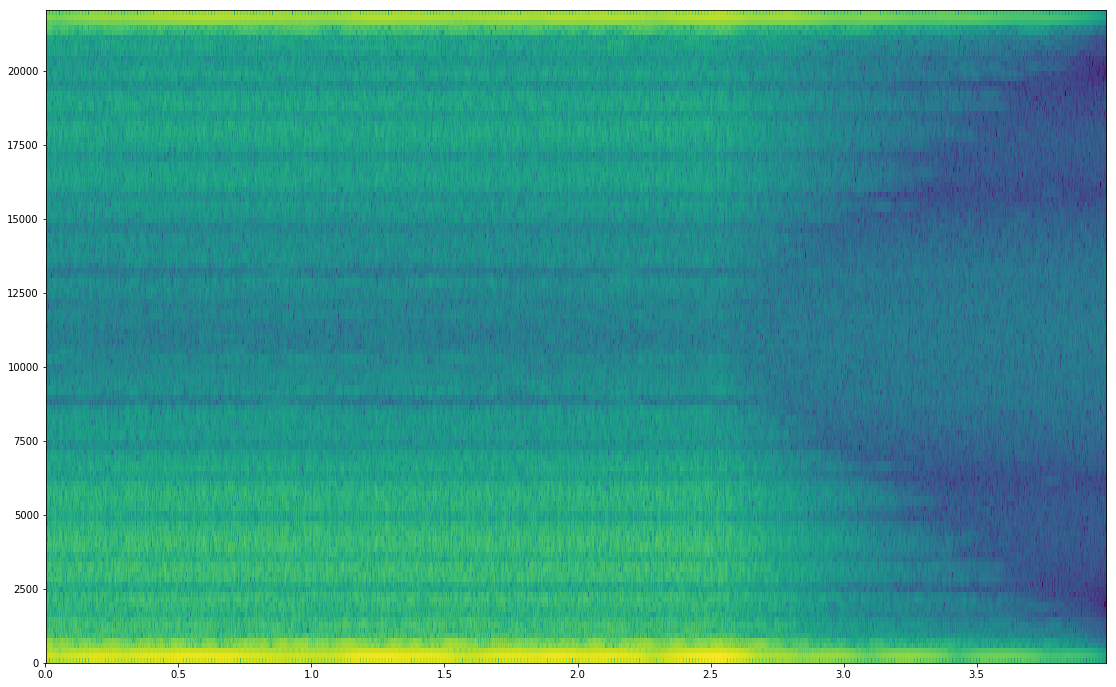

In [4]:
sound_info, frame_rate = get_wav_info('Alesis-Fusion-Voice-Oohs-C4.wav')
pylab.figure(num=None, figsize=(19, 12))
pylab.subplot(111)
pylab.specgram(sound_info, Fs=frame_rate)
pylab.show()